In [1]:
import numpy as np
import pygmt
import h5py
import xarray as xr

In [2]:
with h5py.File('./optimize/gradient_M00.h5') as f:
    # Read the data from the HDF5 file
    x = f['x'][:]
    y = f['y'][:]
    z = f['z'][:]
    gl = f['L_kernel_smooth'][:]
    ggc = f['Gc_kernel_smooth'][:]
    ggs = f['Gs_kernel_smooth'][:]

# max value of gradient
max_gl = np.max(np.abs(gl))
max_ggc = np.max(np.abs(ggc))
max_ggs = np.max(np.abs(ggs))
max_g = max(max_gl, max_ggc, max_ggs)
enf = 1e20
max_g *= enf

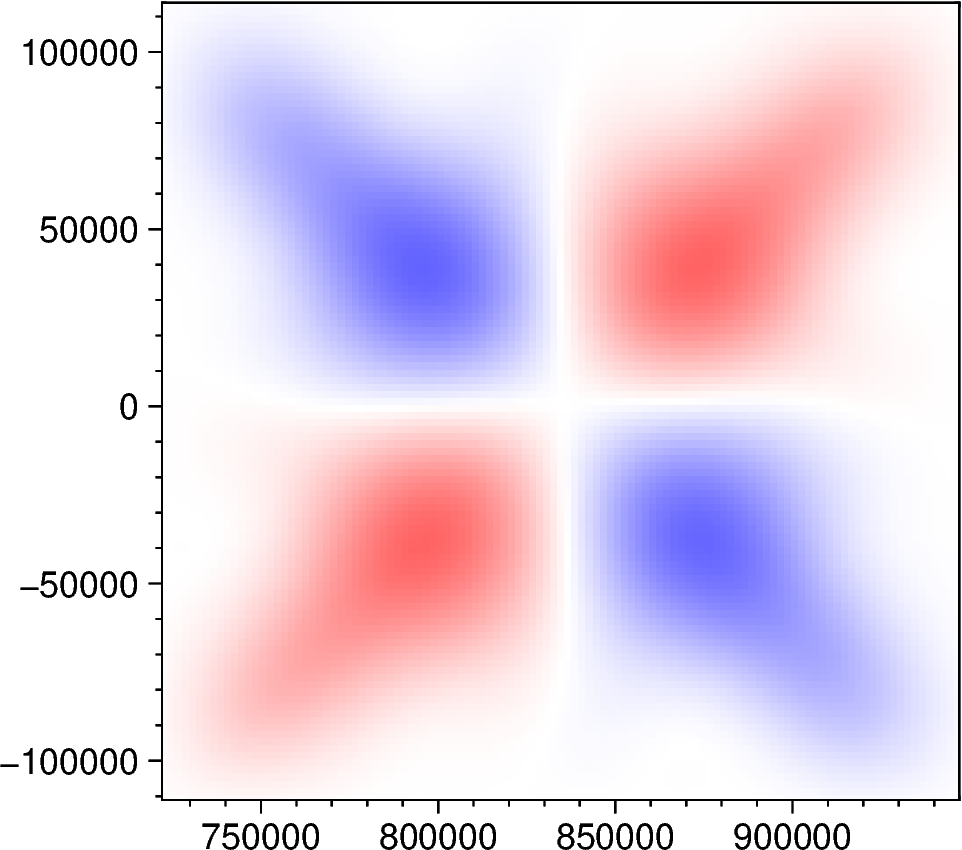

In [ ]:
dep = -7000
iz = np.argmin(np.abs(z - dep))
fig = pygmt.Figure()
fig.basemap(region=[x.min(), x.max(), y.min(), y.max()], projection="x0.00003c", frame=True)
grid = xr.DataArray(
    data=gl[:, :, iz].T*enf,
    dims=["y", "x"],
    coords=[y, x],
)
pygmt.makecpt(cmap='polar', series=[-max_g, max_g, max_g/10], continuous=True, reverse=True)
fig.grdimage(
    grid=grid,
    cmap=True,
)
fig.show()
